In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('casestudy.csv')
data

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


In [34]:
for year in [2015,2016,2017]:
    print(20*'-')
    print(f"Total revenue of {year}:{data[data['year']==year]['net_revenue'].sum():.2f}")
    if year!=2015:
        print(f"Total customers current year {year}:{data[data['year']==year]['net_revenue'].sum():.2f}")
        print(f"Total customers previous year {year-1}:{data[data['year']==year-1]['net_revenue'].sum():.2f}")
        
        prev = data[data['year']==year-1]['customer_email']
        current = data[data['year']==year]['customer_email']
        new_customers = len(list(set(current).difference(prev)))
        new_ids = list(set(current).difference(prev))
        print(f'New customers year {year}: {new_customers}')
        lost_customers = len(list(set(prev).difference(current)))
        lost_ids = list(set(prev).difference(current))
        print(f'Lost customers year {year}: {lost_customers}')
        
        print(f"Revenue from new customers for year {year}\
              {data[data['customer_email'].isin(new_ids)]['net_revenue'].sum():.2f}")
        print(f"Revenue from lost customers for year {year}\
              {data[data['customer_email'].isin(lost_ids)]['net_revenue'].sum():.2f}")
        print(f"Existing growth for year {year}:\
              {data[data['year']==year]['net_revenue'].sum()-data[data['year']==year-1]['net_revenue'].sum():.2f}")
    print(20*'-')
    

--------------------
Total revenue of 2015:,29036749.19
--------------------
--------------------
Total revenue of 2016:,25730943.59
Total customers current year 2016:,25730943.59
Total customers previous year 2015:,29036749.19
New customers year 2016: 145062
Lost customers year 2016: 171710
Revenue from new customers for year 2016              20122363.27
Revenue from lost customers for year 2016              21671259.47
Existing growth for year 2016:              -3305805.60
--------------------
--------------------
Total revenue of 2017:,31417495.03
Total customers current year 2017:,31417495.03
Total customers previous year 2016:,25730943.59
New customers year 2017: 229028
Lost customers year 2017: 183687
Revenue from new customers for year 2017              28871866.41
Revenue from lost customers for year 2017              29802549.78
Existing growth for year 2017:              5686551.44
--------------------


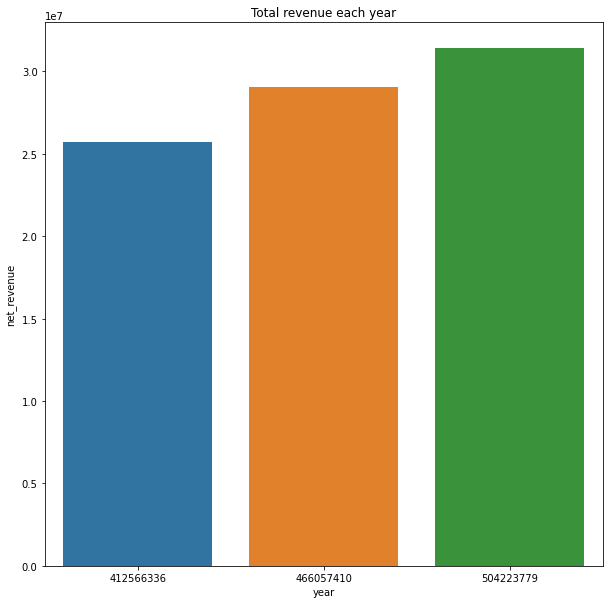

In [40]:
import  matplotlib.pyplot as plt

total_revenue = data.groupby(by='year')[['year','net_revenue']].sum()
plt.figure(figsize=(10,10))
plt.title('Total revenue each year')
sns.barplot(x='year',y='net_revenue',data=total_revenue)
plt.show()

In [42]:
# Check what mail customers use
data['mail'] = data['customer_email'].apply(lambda x:x.split('@')[1])
data['mail'].value_counts()

gmail.com     644356
gmail.com      41571
Name: mail, dtype: int64